In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv('E:\github\DS-Olympus-\machineLearning\loanPrediction\Dataset\loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
data.shape

(614, 13)

In [5]:
data.drop("Loan_ID", axis=1, inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# null values??
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# filling missing values
data.fillna({"Gender":"Male",
		"Married":"Yes",
		"Dependents":"0",
		"Self_Employed":"No",
		"LoanAmount":data["LoanAmount"].mean(),
		"Loan_Amount_Term":data["Loan_Amount_Term"].mean(),
		"Credit_History":1
		}, inplace=True)
print(data.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [8]:
# handling categorical values
cat_cols = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents"]
df = pd.get_dummies(data[cat_cols],drop_first = True)
print(df.head())

   Gender_Male  Married_Yes  Education_Not Graduate  Self_Employed_Yes  \
0            1            0                       0                  0   
1            1            1                       0                  0   
2            1            1                       0                  1   
3            1            1                       1                  0   
4            1            0                       0                  0   

   Property_Area_Semiurban  Property_Area_Urban  Dependents_1  Dependents_2  \
0                        0                    1             0             0   
1                        0                    0             1             0   
2                        0                    1             0             0   
3                        0                    1             0             0   
4                        0                    1             0             0   

   Dependents_3+  
0              0  
1              0  
2              0  
3   

In [9]:
new_data = pd.concat([data,df], axis=1)
print(new_data)


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [10]:
new_data.drop(cat_cols ,axis=1, inplace=True)
print(new_data)
print(" ")
print(new_data.shape)
print(new_data.columns)


     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History Loan_Status  Gender_Male  Married_Yes  \
0               1.0           Y            1            0   
1

In [11]:
features = new_data.drop("Loan_Status",axis=1)
target = new_data["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=300)

# model and fit
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
print("Training score: ",model.score(x_train,y_train))
print("Testing score: ",model.score(x_test,y_test))

Training score:  0.8021739130434783
Testing score:  0.8506493506493507


In [15]:
# performance
y_pred = model.predict(x_test)
cr =  classification_report(y_test,y_pred)
print("---------------- CLASSIFICATION REPORT -------------------")
print(cr)

---------------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           N       0.92      0.51      0.66        43
           Y       0.84      0.98      0.90       111

    accuracy                           0.85       154
   macro avg       0.88      0.75      0.78       154
weighted avg       0.86      0.85      0.84       154



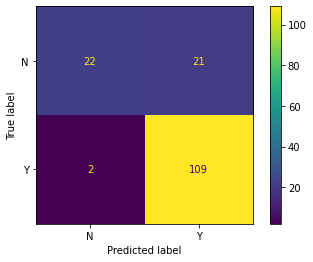

In [14]:
plot_confusion_matrix(model,x_test,y_test)

In [17]:
# predictions
d = [[5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,0,0,0]]
print("Y-Yes/N-No")
print("Loan Status: ",model.predict(d))

Y-Yes/N-No
Loan Status:  ['Y']
